In [5]:
import datetime
import numpy as np
import pandas as pd
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.lda import LDA
from sklearn.qda import QDA

import matplotlib.pyplot as plt

In [2]:
symbol = 'SPY'
start_date = '2012-01-01'
end_date = '2016-12-31'
start_test = '2016-12-18'

In [3]:
ts = get_pricing('SPY', start_date, end_date)
ts.head()

,open_price,high,low,close_price,volume,price
2012-01-03 00:00:00+00:00,116.080,116.643,115.780,115.925,145314347.0,115.925
2012-01-04 00:00:00+00:00,115.571,116.125,115.126,116.007,105644656.0,116.007
2012-01-05 00:00:00+00:00,115.398,116.506,114.871,116.352,143200079.0,116.352
2012-01-06 00:00:00+00:00,116.478,116.497,115.653,116.107,119860034.0,116.107
2012-01-09 00:00:00+00:00,116.298,116.461,115.762,116.298,85232476.0,116.298


In [6]:
tslag = ts[['price']].copy()

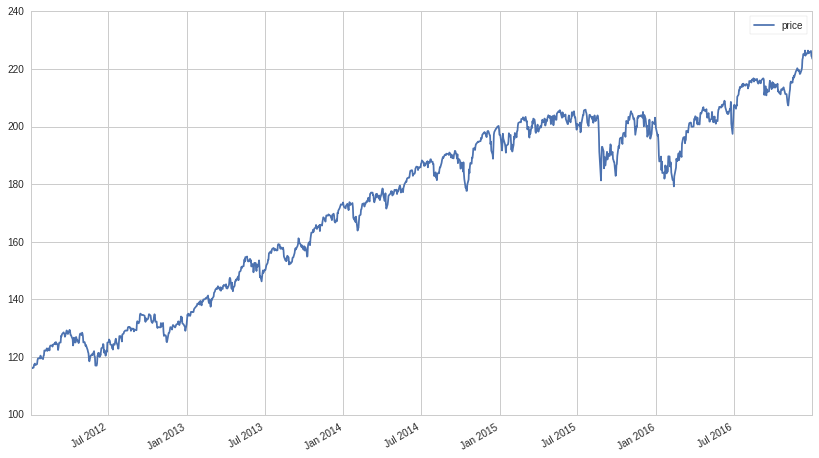

In [7]:
tslag.plot()

In [8]:
lags = 5

for i in range(0, lags):
    tslag["LAG_" + str(i + 1)] = tslag['price'].shift(i + 1)
tslag['returns'] = tslag['price'].pct_change()

In [9]:
tslag.head()

,price,LAG_1,LAG_2,LAG_3,LAG_4,LAG_5,returns
2012-01-03 00:00:00+00:00,115.925,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 00:00:00+00:00,116.007,115.925,NaN,NaN,NaN,NaN,0.000707
2012-01-05 00:00:00+00:00,116.352,116.007,115.925,NaN,NaN,NaN,0.002974
2012-01-06 00:00:00+00:00,116.107,116.352,116.007,115.925,NaN,NaN,-0.002106
2012-01-09 00:00:00+00:00,116.298,116.107,116.352,116.007,115.925,NaN,0.001645


In [10]:
for k, v in enumerate(tslag['returns']):
    if (abs(v) < 0.0001):
        tslag['returns'][k] = 0.0001

In [11]:
for i in range(0, lags):
    tslag["LAG_returns" + str(i + 1)] = tslag["LAG_" + str(i + 1)].pct_change()

In [12]:
tslag.head()

,price,LAG_1,LAG_2,LAG_3,LAG_4,LAG_5,returns,LAG_returns1,LAG_returns2,LAG_returns3,LAG_returns4,LAG_returns5
2012-01-03 00:00:00+00:00,115.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04 00:00:00+00:00,116.007,115.925,NaN,NaN,NaN,NaN,0.000707,NaN,NaN,NaN,NaN,NaN
2012-01-05 00:00:00+00:00,116.352,116.007,115.925,NaN,NaN,NaN,0.002974,0.000707,NaN,NaN,NaN,NaN
2012-01-06 00:00:00+00:00,116.107,116.352,116.007,115.925,NaN,NaN,-0.002106,0.002974,0.000707,NaN,NaN,NaN
2012-01-09 00:00:00+00:00,116.298,116.107,116.352,116.007,115.925,NaN,0.001645,-0.002106,0.002974,0.000707,NaN,NaN


In [13]:
tslag['Direction'] = np.sign(tslag['returns'])
tslag.dropna(inplace=True)

In [14]:
tslag.head()

,price,LAG_1,LAG_2,LAG_3,LAG_4,LAG_5,returns,LAG_returns1,LAG_returns2,LAG_returns3,LAG_returns4,LAG_returns5,Direction
2012-01-11 00:00:00+00:00,117.424,117.352,116.298,116.107,116.352,116.007,0.000614,0.009063,0.001645,-0.002106,0.002974,0.000707,1.0
2012-01-12 00:00:00+00:00,117.688,117.424,117.352,116.298,116.107,116.352,0.002248,0.000614,0.009063,0.001645,-0.002106,0.002974,1.0
2012-01-13 00:00:00+00:00,117.160,117.688,117.424,117.352,116.298,116.107,-0.004486,0.002248,0.000614,0.009063,0.001645,-0.002106,-1.0
2012-01-17 00:00:00+00:00,117.506,117.160,117.688,117.424,117.352,116.298,0.002953,-0.004486,0.002248,0.000614,0.009063,0.001645,1.0
2012-01-18 00:00:00+00:00,118.823,117.506,117.160,117.688,117.424,117.352,0.011208,0.002953,-0.004486,0.002248,0.000614,0.009063,1.0


In [15]:
X = tslag[['LAG_1', 'LAG_2']]
y = tslag['Direction']

In [16]:
X_train = X[X.index < start_test]
X_test = X[X.index >= start_test]
y_train = y[y.index < start_test]
y_test = y[y.index >= start_test]

In [17]:
pred = pd.DataFrame(index = y_test.index)

# LogisticRegression

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
pred = (1.0 + (y_pred == y_test))/2
hit_rate = np.mean(pred)
print(hit_rate)

0.7222222222222222


# LDA

In [19]:
lda = LDA()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
pred = (1.0 + (y_pred == y_test))/2
hit_rate = np.mean(pred)
print(hit_rate)

0.7222222222222222


# QDA

In [20]:
qda = QDA()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
pred = (1.0 + (y_pred == y_test))/2
hit_rate = np.mean(pred)
print(hit_rate)

0.7777777777777778
